In [3]:
from scipy.io import readsav
import cdflib
import pyspedas
import pytplot
from pytplot import tplot, store_data, get_data ,tlimit,xlim,ylim,tplot_options,options,split_vec,cdf_to_tplot,divide,tplot_names,get_timespan
from pyspedas import time_string, time_double, tdpwrspc, twavpol
import wget
from warnings import simplefilter 
simplefilter(action='ignore', category=DeprecationWarning)
import cdflib
from datetime import datetime,timedelta
import os.path
import bisect
import csv
from scipy import interpolate

#%matplotlib notebook
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
#import math functions 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import dateutil.parser

from matplotlib import ticker, cm
import warnings 
warnings.filterwarnings("ignore")


from warnings import simplefilter 
simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
!pip install wget

  Using cached wget-3.2-py3-none-any.whl


In [4]:
filename='PSP_WaveAnalysis_2021-04-29_0600_v1.2.cdf'
wvfile = cdflib.CDF(filename)
print(wvfile._get_varnames())

([], ['FFT_time', 'FFT_time_1', 'Frequencies', 'ellipticity_b', 'FFT_time_2', 'Frequencies_1', 'wave_normal_b', 'FFT_time_3', 'Frequencies_2', 'coherency_b', 'FFT_time_4', 'Frequencies_3', 'B_power_para', 'FFT_time_5', 'Frequencies_4', 'B_power_perp', 'FFT_time_6', 'Frequencies_5', 'Wave_Power_b', 'FFT_time_7', 'Frequencies_6', 'S_mag', 'FFT_time_8', 'Frequencies_7', 'S_Theta', 'FFT_time_9', 'Frequencies_8', 'S_Phi', 'FFT_time_10', 'Frequencies_9', 'Sn', 'FFT_time_11', 'Frequencies_10', 'Sp', 'FFT_time_12', 'Frequencies_11', 'Sq', 'Bfield_time', 'Bn', 'Bfield_time_1', 'Bp', 'Bfield_time_2', 'Bq', 'FFT_time_13', 'Frequencies_12', 'Bn_fft', 'FFT_time_14', 'Frequencies_13', 'Bp_fft', 'FFT_time_15', 'Frequencies_14', 'Bq_fft', 'FFT_time_16', 'Frequencies_15', 'ellipticity_e', 'FFT_time_17', 'Frequencies_16', 'wave_normal_e', 'FFT_time_18', 'Frequencies_17', 'coherency_e', 'FFT_time_19', 'Frequencies_18', 'E_power_para', 'FFT_time_20', 'Frequencies_19', 'E_power_perp', 'FFT_time_21', 'Frequ

In [5]:
fft_time = wvfile['FFT_time']
frequencies = wvfile['Frequencies']
bpow_perp = wvfile['B_power_perp']
bpow_para = wvfile['B_power_para']
Smag = wvfile['S_mag']


In [6]:
#convert time
import datetime
datetime_t0 = datetime.datetime(2000, 1, 1, 12, 0, 0)
epoch = cdflib.cdfepoch.to_datetime(wvfile.varget('FFT_time'))

year=2021
month=4
day=29

hour_start = 7
minute_start = 0
second_start = 0

timeSlice_start  = datetime.datetime(year, month, day, hour_start, minute_start, second_start)
print('Desired timeslice start:',timeSlice_start)

#find index for desired timeslice
tSliceIndex_start  = bisect.bisect_left(epoch,timeSlice_start)
print('time Index start:',tSliceIndex_start)
print('Time of closest start data point:',epoch[tSliceIndex_start])


hour_stop = 9
minute_stop = 0
second_stop = 0

timeSlice_stop  = datetime.datetime(year, month, day, hour_stop, minute_stop, second_stop)
print('Desired timeslice stop:',timeSlice_stop)

#find index for desired timeslice
tSliceIndex_stop  = bisect.bisect_left(epoch,timeSlice_stop)
print('time Index stop:',tSliceIndex_stop)
print('Time of closest stop data point:',epoch[tSliceIndex_stop])

Desired timeslice start: 2021-04-29 07:00:00
time Index start: 8236
Time of closest start data point: 2021-04-29 07:00:00.289720
Desired timeslice stop: 2021-04-29 09:00:00
time Index stop: 24715
Time of closest stop data point: 2021-04-29 09:00:00.426232


In [11]:
print(fft_time.shape)
print(frequencies.shape)
print(bpow_perp.shape)

(49428,)
(112,)
(49428, 112)


In [10]:
fft_epoch_repeat = np.repeat(np.expand_dims(epoch,1),112,1)
print(fft_epoch_repeat.shape)
frequencies_repeat = np.transpose(np.repeat(np.expand_dims(frequencies,1),49428,1))
print(frequencies_repeat.shape)

(49428, 112)
(49428, 112)


In [19]:
print(fft_time)

[672948070934712064 672948071371640064 672948071808568064 ...
 672969666101112064 672969666538040064 672969666974968064]


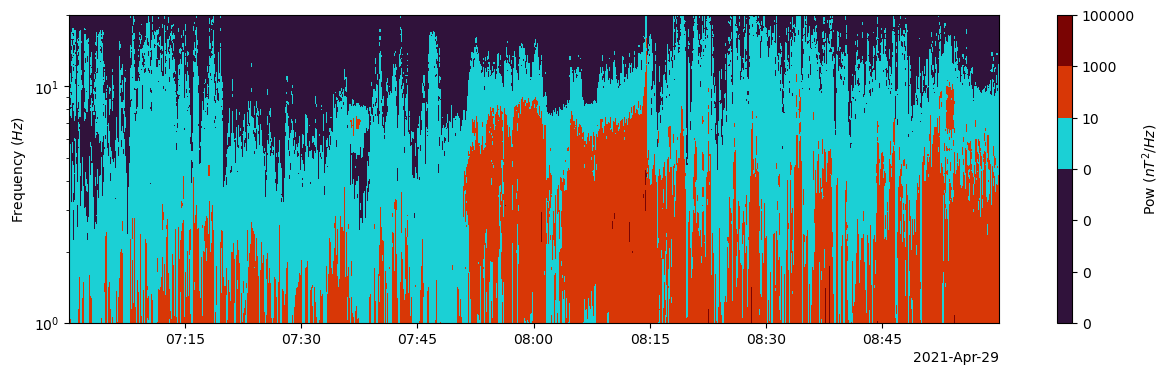

In [8]:
import matplotlib.colors as colors
fig = plt.figure()
s=plt.contourf(fft_epoch_repeat[tSliceIndex_start:tSliceIndex_stop,:],frequencies_repeat[tSliceIndex_start:tSliceIndex_stop,:],
         bpow_perp[tSliceIndex_start:tSliceIndex_stop,:],cmap='turbo',shading='auto',norm=colors.LogNorm(vmin=1e-1, vmax=3e2))
plt.ylim(1,20)
plt.yscale("log")
plt.ylabel('Frequency $(Hz)$')
cbar = plt.colorbar(s,label=f'Pow ($nT^2/Hz$)')
fig.set_size_inches(15,4)

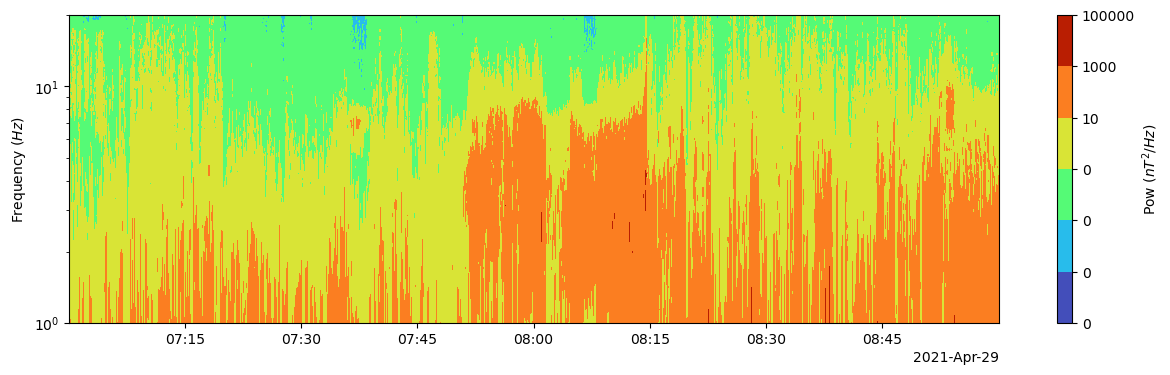

In [39]:
fig = plt.figure()
s=plt.contourf(fft_epoch_repeat[tSliceIndex_start:tSliceIndex_stop,:],frequencies_repeat[tSliceIndex_start:tSliceIndex_stop,:],
         bpow_perp[tSliceIndex_start:tSliceIndex_stop,:],cmap='turbo',locator=ticker.LogLocator(),levels=20)
plt.ylim(1,20)
plt.yscale("log")
plt.ylabel('Frequency $(Hz)$')
cbar = plt.colorbar(s,label=f'Pow ($nT^2/Hz$)')
fig.set_size_inches(15,4)

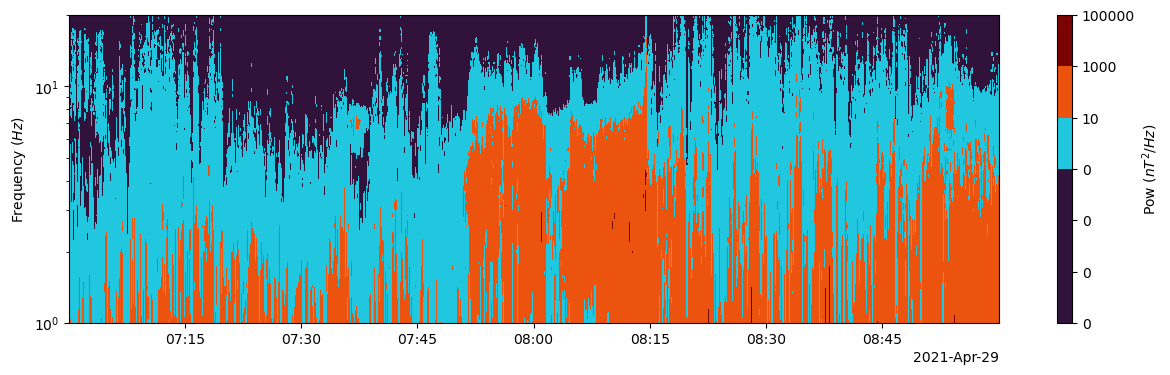

In [20]:
fig, ax = plt.subplots()
cs = ax.contourf(fft_epoch_repeat[tSliceIndex_start:tSliceIndex_stop,:],frequencies_repeat[tSliceIndex_start:tSliceIndex_stop,:],
         bpow_perp[tSliceIndex_start:tSliceIndex_stop,:],locator=ticker.LogLocator(),cmap='turbo',levels=20,norm = colors.LogNorm(vmin=1e-1, vmax=5e2))
cmap='turbo'
norm = colors.LogNorm(vmin=1e-1, vmax=5e2)
plt.ylim(1,20)
plt.yscale("log")
plt.ylabel('Frequency $(Hz)$')
cbar = plt.colorbar(cs,label=f'Pow ($nT^2/Hz$)')
fig.set_size_inches(15,4)

TypeError: Dimensions of C (16479, 112) are incompatible with X (112) and/or Y (16479); see help(pcolormesh)

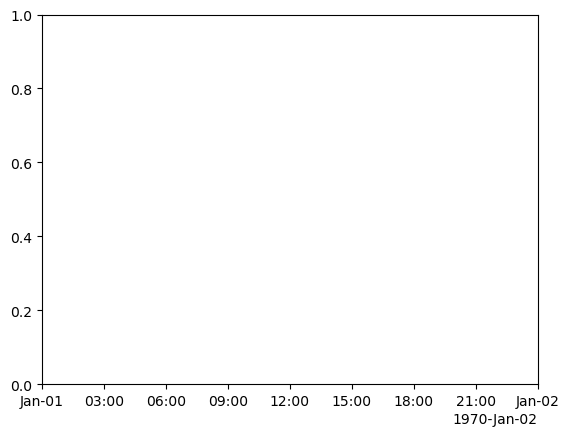

In [11]:
import matplotlib.colors as colors
fig = plt.figure()
s=plt.pcolormesh(fft_epoch_repeat[tSliceIndex_start:tSliceIndex_stop,:],frequencies_repeat[tSliceIndex_start:tSliceIndex_stop,:]
                 ,bpow_perp[tSliceIndex_start:tSliceIndex_stop,:],cmap='turbo',shading='flat',norm = colors.LogNorm(vmin=1e-1, vmax=1e2))
plt.ylim(.1,20)
plt.yscale("log")
plt.ylabel('Frequency $(Hz)$')
cbar = plt.colorbar(s,label=f'Pow ($nT^2/Hz$)')
fig.set_size_inches(15,4)

In [37]:
print(frequencies)

[ 0.28515625  0.5703125   0.85546875  1.140625    1.42578125  1.7109375
  1.99609375  2.28125     2.56640625  2.8515625   3.13671875  3.421875
  3.70703125  3.9921875   4.27734375  4.5625      4.84765625  5.1328125
  5.41796875  5.703125    5.98828125  6.2734375   6.55859375  6.84375
  7.12890625  7.4140625   7.69921875  7.984375    8.26953125  8.5546875
  8.83984375  9.125       9.41015625  9.6953125   9.98046875 10.265625
 10.55078125 10.8359375  11.12109375 11.40625    11.69140625 11.9765625
 12.26171875 12.546875   12.83203125 13.1171875  13.40234375 13.6875
 13.97265625 14.2578125  14.54296875 14.828125   15.11328125 15.3984375
 15.68359375 15.96875    16.25390625 16.5390625  16.82421875 17.109375
 17.39453125 17.6796875  17.96484375 18.25       18.53515625 18.8203125
 19.10546875 19.390625   19.67578125 19.9609375  20.24609375 20.53125
 20.81640625 21.1015625  21.38671875 21.671875   21.95703125 22.2421875
 22.52734375 22.8125     23.09765625 23.3828125  23.66796875 23.953125
 24

In [38]:
from scipy.interpolate import interp1d
x=frequencies
y=frequencies
xnew=np.linspace(x[0],x[-1],len(x)*2)
interpolater=interp1d(x,y,bounds_error=False)
ynew=interpolater(xnew)

In [39]:
print(ynew)

[ 0.28515625  0.42709501  0.56903377  0.71097253  0.85291129  0.99485006
  1.13678882  1.27872758  1.42066634  1.5626051   1.70454386  1.84648262
  1.98842138  2.13036015  2.27229891  2.41423767  2.55617643  2.69811519
  2.84005395  2.98199271  3.12393147  3.26587024  3.407809    3.54974776
  3.69168652  3.83362528  3.97556404  4.1175028   4.25944156  4.40138033
  4.54331909  4.68525785  4.82719661  4.96913537  5.11107413  5.25301289
  5.39495165  5.53689041  5.67882918  5.82076794  5.9627067   6.10464546
  6.24658422  6.38852298  6.53046174  6.6724005   6.81433927  6.95627803
  7.09821679  7.24015555  7.38209431  7.52403307  7.66597183  7.80791059
  7.94984936  8.09178812  8.23372688  8.37566564  8.5176044   8.65954316
  8.80148192  8.94342068  9.08535945  9.22729821  9.36923697  9.51117573
  9.65311449  9.79505325  9.93699201 10.07893077 10.22086953 10.3628083
 10.50474706 10.64668582 10.78862458 10.93056334 11.0725021  11.21444086
 11.35637962 11.49831839 11.64025715 11.78219591 11.

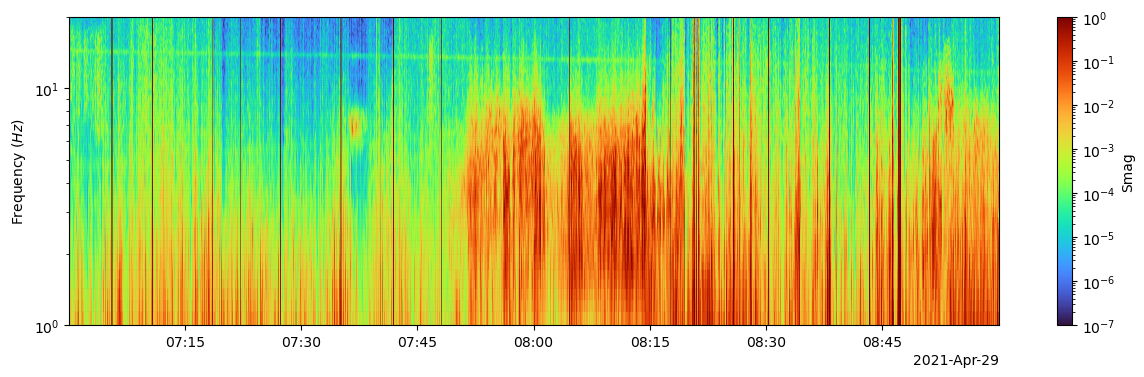

In [31]:
fig = plt.figure()
s=plt.pcolormesh(fft_epoch_repeat[tSliceIndex_start:tSliceIndex_stop,:],frequencies_repeat[tSliceIndex_start:tSliceIndex_stop,:],
         Smag[tSliceIndex_start:tSliceIndex_stop,:],cmap='turbo',shading='gouraud',norm = colors.LogNorm(vmin=1e-7, vmax=1e0))
plt.ylim(1,20)
plt.yscale("log")
plt.ylabel('Frequency $(Hz)$')
cbar = plt.colorbar(s,label=f'Smag')
fig.set_size_inches(15,4)

In [25]:
print(Z.shape)

(16479, 112)


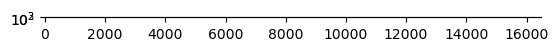

In [24]:
fig, ax = plt.subplots()
X= fft_epoch[tSliceIndex_start:tSliceIndex_stop]
Y=frequencies[tSliceIndex_start:tSliceIndex_stop,:]
 zz = griddata((x, y), z, (xx, yy), method="linear")

Z=bpow_perp[tSliceIndex_start:tSliceIndex_stop,:]
im = ax.imshow(np.transpose(Z), interpolation='bilinear', cmap='turbo',
              norm=colors.LogNorm(vmin=1e-1, vmax=1e2))
plt.yscale('log')

plt.show()

In [21]:
cdf_to_tplot(filename)

['FFT_time',
 'ellipticity_b',
 'wave_normal_b',
 'coherency_b',
 'B_power_para',
 'B_power_perp',
 'Wave_Power_b',
 'S_mag',
 'S_Theta',
 'S_Phi',
 'Sn',
 'Sp',
 'Sq',
 'Bn',
 'Bp',
 'Bq',
 'ellipticity_e',
 'wave_normal_e',
 'coherency_e',
 'E_power_para',
 'E_power_perp',
 'Wave_Power_e',
 'kx_B',
 'ky_B',
 'kz_B',
 'kx_E',
 'ky_E',
 'kz_E']

In [ ]:

fig, ax = plt.subplots(figsize=(6, 1))

cmap = cm.turbo
norm = colors.LogNorm(vmin=1e-1, vmax=5e2)

fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, label='Some Units')

In [33]:
options('ellipticity_b','zrange',[-1,1])
options('ellipticity_b','ylog',1)
options("coherency_b","zrange",[0,1])
options('coherency_b','ylog',1)
options('B_power_para','zrange',[.1,100])
options('B_power_para','ylog',1)
options('B_power_perp','zrange',[.1,100])
options('B_power_perp','ylog',1)
options('S_mag','zrange',[0,180])
options('S_mag','ylog',1)

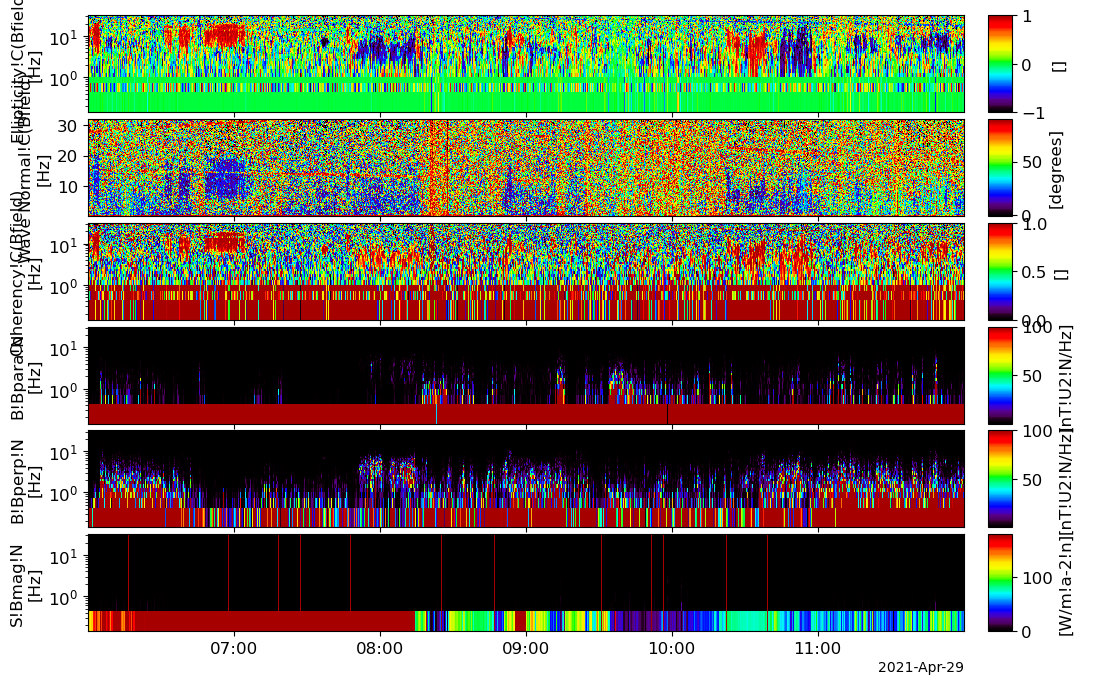

In [34]:
tplot(['ellipticity_b','wave_normal_b','coherency_b','B_power_para','B_power_perp','S_mag'])

In [ ]:

options,('coherency_b','zlim',
options('B_power_para','
options('B_power_perp',
options('Wave_Power_b',
options('S_mag,